# Data Preprocessing Tools

## Importing the libraries

In [30]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [56]:
dataset = pd.read_csv('Salary_Data.csv')
X = dataset.iloc[:, :-1]
y = dataset.iloc[:, -1]

In [32]:
dataset.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [57]:
print(X)

    YearsExperience
0               1.1
1               1.3
2               1.5
3               2.0
4               2.2
5               2.9
6               3.0
7               3.2
8               3.2
9               3.7
10              3.9
11              4.0
12              4.0
13              4.1
14              4.5
15              4.9
16              5.1
17              5.3
18              5.9
19              6.0
20              6.8
21              7.1
22              7.9
23              8.2
24              8.7
25              9.0
26              9.5
27              9.6
28             10.3
29             10.5


In [34]:
print(y)

0      39343.0
1      46205.0
2      37731.0
3      43525.0
4      39891.0
5      56642.0
6      60150.0
7      54445.0
8      64445.0
9      57189.0
10     63218.0
11     55794.0
12     56957.0
13     57081.0
14     61111.0
15     67938.0
16     66029.0
17     83088.0
18     81363.0
19     93940.0
20     91738.0
21     98273.0
22    101302.0
23    113812.0
24    109431.0
25    105582.0
26    116969.0
27    112635.0
28    122391.0
29    121872.0
Name: Salary, dtype: float64


## Splitting the dataset into the Training set and Test set

In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [36]:
print(X_train)

    YearsExperience
26              9.5
3               2.0
24              8.7
22              7.9
23              8.2
4               2.2
2               1.5
25              9.0
6               3.0
18              5.9
13              4.1
7               3.2
27              9.6
1               1.3
16              5.1
0               1.1
15              4.9
29             10.5
28             10.3
9               3.7
8               3.2
12              4.0
11              4.0
5               2.9


In [37]:
print(X_test)

    YearsExperience
17              5.3
21              7.1
10              3.9
19              6.0
14              4.5
20              6.8


In [38]:
print(y_train)

26    116969.0
3      43525.0
24    109431.0
22    101302.0
23    113812.0
4      39891.0
2      37731.0
25    105582.0
6      60150.0
18     81363.0
13     57081.0
7      54445.0
27    112635.0
1      46205.0
16     66029.0
0      39343.0
15     67938.0
29    121872.0
28    122391.0
9      57189.0
8      64445.0
12     56957.0
11     55794.0
5      56642.0
Name: Salary, dtype: float64


In [39]:
print(y_test)

17    83088.0
21    98273.0
10    63218.0
19    93940.0
14    61111.0
20    91738.0
Name: Salary, dtype: float64


Training the Simple Regression Model

In [40]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression() 
lm.fit(X_train, y_train)

LinearRegression()

In [41]:
lm.intercept_

25609.89799835482

In [42]:
lm.coef_

array([9332.94])

Predicting the Test set results

In [43]:
X_pred = lm.predict(X_train)

In [44]:
X_pred

array([114272.87,  44275.79, 106806.52,  99340.16, 102140.04,  46142.38,
        39609.32, 109606.4 ,  53608.73,  80674.27,  63874.97,  55475.32,
       115206.17,  37742.73,  73207.92,  35876.14,  71341.33, 123605.82,
       121739.23,  60141.79,  55475.32,  62941.68,  62941.68,  52675.44])

In [45]:
y_pred = lm.predict(X_test)

In [46]:
y_pred

array([75074.51, 91873.81, 62008.38, 81607.57, 67608.15, 89073.92])

In [47]:
y_test

17    83088.0
21    98273.0
10    63218.0
19    93940.0
14    61111.0
20    91738.0
Name: Salary, dtype: float64

Visualising the Training set results (the regression line)

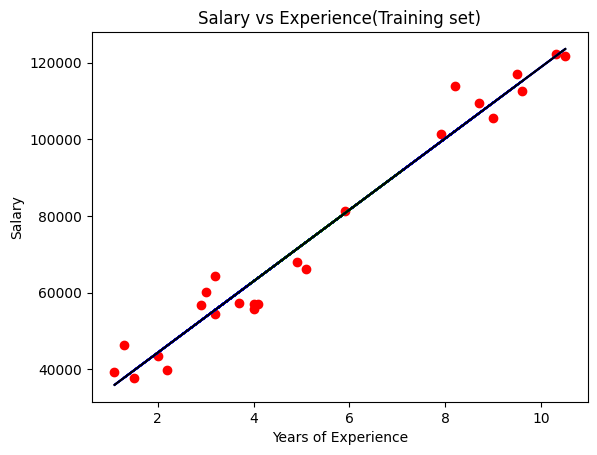

In [48]:
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train,X_pred, color ='blue' ) # X_pred = lm.predict(X_train)
plt.plot(X_test,y_pred, color ='green' ) # y_pred = lm.predict(X_test)
plt.plot(X,lm.predict(X), color ='black')
plt.title('Salary vs Experience(Training set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

Visualising the Test set results

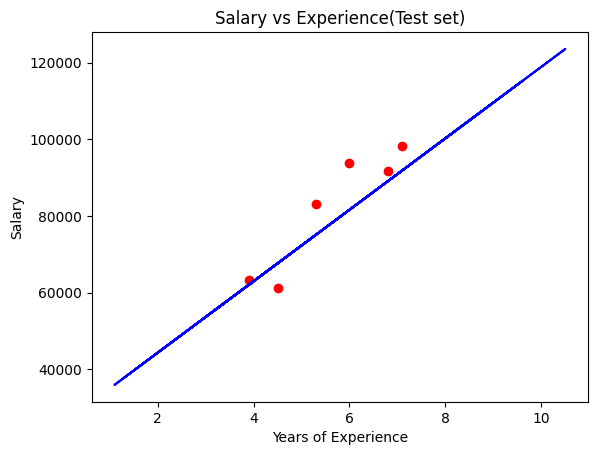

In [49]:
plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_train,lm.predict(X_train), color ='blue' )
plt.title('Salary vs Experience(Test set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

In [51]:
# combine y_pred and y_test into one a dataframe

pd.DataFrame({'y_pred':y_pred, 'y_test':y_test}).head()


,y_pred,y_test
17,75074.505110,83088.0
21,91873.805638,98273.0
10,62008.382477,63218.0
19,81607.566426,93940.0
14,67608.149319,61111.0


In [52]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.7616681465472094

In [53]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred)

51338023.49224842

In [ ]:
# if mean_squared_error is 51338023.49224842, then it means that the average squared difference between the estimated values and the actual value is 51338023.49224842

